<a href="https://colab.research.google.com/github/Pakhi27/Amplitude-Envelope-Time-Domain/blob/main/Amplitude_Envelope_Time_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display

In [2]:
#load audio frames
BE_file="C:\\Users\\singh\\OneDrive\\Desktop\\BabyElephantWalk60.wav"
SW_file="C:\\Users\\singh\\OneDrive\\Desktop\\StarWars3.wav"
CB_file="C:\\Users\\singh\\OneDrive\\Desktop\\CantinaBand60.wav"

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# After mounting, you can access your Google Drive files at /content/drive/My Drive


Mounted at /content/drive


In [10]:
BE_file = "/content/drive/MyDrive/BabyElephantWalk60.wav"
SW_file="/content/drive/MyDrive/StarWars3.wav"
Cb_file="/content/drive/MyDrive/CantinaBand60.wav"

In [6]:
import IPython.display as ipd

In [7]:
# Load audio data and sampling rate
BE, sr = librosa.load(BE_file)

# Play the audio
ipd.Audio(data=BE, rate=sr)

In [14]:
# Load audio data and sampling rate
SW, sr1 = librosa.load(SW_file)

# Play the audio
ipd.Audio(data=SW, rate=sr)

In [15]:
# Load audio data and sampling rate
CB, sr2 = librosa.load(Cb_file)

# Play the audio
ipd.Audio(data=CB, rate=sr)

Basic information regarding audio files

In [16]:
BE.shape

(1323000,)

In [19]:
# duration in seconds of 1 sample
# So, two audio files can have the same level of detail (same sample rate) but differ in how long the sound lasts.
sample_duration_BE = 1 / sr
print(f"One sample lasts for {sample_duration_BE:6f} seconds")

One sample lasts for 0.000045 seconds


In [20]:
# duration in seconds of 1 sample
sample_duration_SW = 1 / sr1
print(f"One sample lasts for {sample_duration_SW:6f} seconds")

One sample lasts for 0.000045 seconds


In [21]:
# duration in seconds of 1 sample
sample_duration_CB = 1 / sr2
print(f"One sample lasts for {sample_duration_CB:6f} seconds")

One sample lasts for 0.000045 seconds


In [22]:
# total number of samples in audio file
tot_samples = len(BE)
tot_samples

1323000

In [23]:
# duration of  BE audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 60.0 seconds


In [24]:
# total number of samples in audio file
tot_samples = len(SW)
tot_samples

66150

In [26]:
# duration of SW audio in seconds
duration = 1 / sr1 * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 3.0 seconds


Visualising audio signal in the time domain

In [29]:
import matplotlib.pyplot as plt
import librosa
import librosa.display


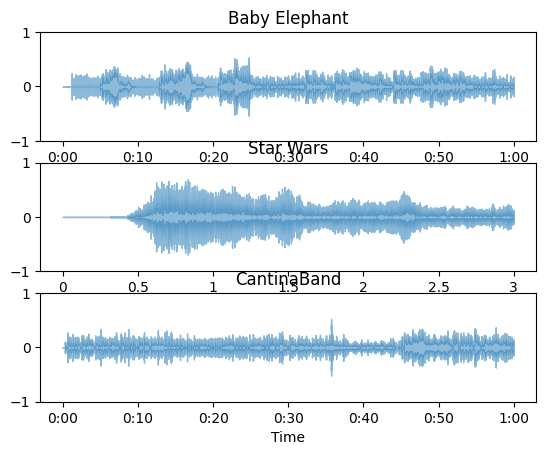

In [31]:

plt.subplot(3, 1, 1)
librosa.display.waveshow(BE, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Baby Elephant")

plt.subplot(3, 1, 2)
librosa.display.waveshow(SW, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Star Wars")

plt.subplot(3, 1, 3)
librosa.display.waveshow(CB, alpha=0.5)
plt.ylim((-1, 1))
plt.title("CantinaBand")

plt.show()

In [ ]:
#Samples
# Definition: A sample is a single measurement of the amplitude (loudness) of an audio signal at a specific point in time.
# Role: It's the fundamental unit of an audio signal. The more samples per second (sample rate), the higher the fidelity of the audio.
# Analogy: Think of a sample as a single pixel in a digital image.

# Frames
# Definition: A frame is a group of samples that are processed together as a unit.
# Role: Frames are used to introduce additional information or perform operations on the audio signal, such as compression, filtering, or synchronization.
# Analogy: Imagine a frame as a block of pixels in an image.

Calculating Amplitude Envelope

In [32]:
import numpy as np

In [33]:
#used for non overlapping frames
FRAME_SIZE = 1024

#used for overlapping frames
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []

    # calculate amplitude envelope for each frame
    # range(start,stop,step)

    for i in range(0, len(signal), hop_length):
        # all the samples in the frame.
        # slicing signal considering samples for a given frame.
        amplitude_envelope_current_frame = max(signal[i:i+frame_size])
        amplitude_envelope.append(amplitude_envelope_current_frame)

    return np.array(amplitude_envelope)

In [34]:
# Fancy Amplitude Envelope
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [ ]:
# The amplitude envelope is a representation of the loudness of an audio signal over time. It doesn't directly depend on the duration of the audio. Instead, it depends on the overall shape and intensity of the sound.

In [35]:
# number of frames in amplitude envelope of baby elephant
ae_baby_elephant = amplitude_envelope(BE, FRAME_SIZE, HOP_LENGTH)
len(ae_baby_elephant)

2584

In [37]:
# number of frames in amplitude envelope of Star wars and CantinaBand
ae_star_wars = amplitude_envelope(SW, FRAME_SIZE, HOP_LENGTH)
len(ae_star_wars)
ae_cantina_band = amplitude_envelope(CB, FRAME_SIZE, HOP_LENGTH)
len(ae_cantina_band)

2584

Visualising amplitude envelope

In [38]:
frames = range(len(ae_baby_elephant))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [40]:
frames1 = range(len(ae_star_wars))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)

In [41]:
frames2 = range(len(ae_cantina_band))
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

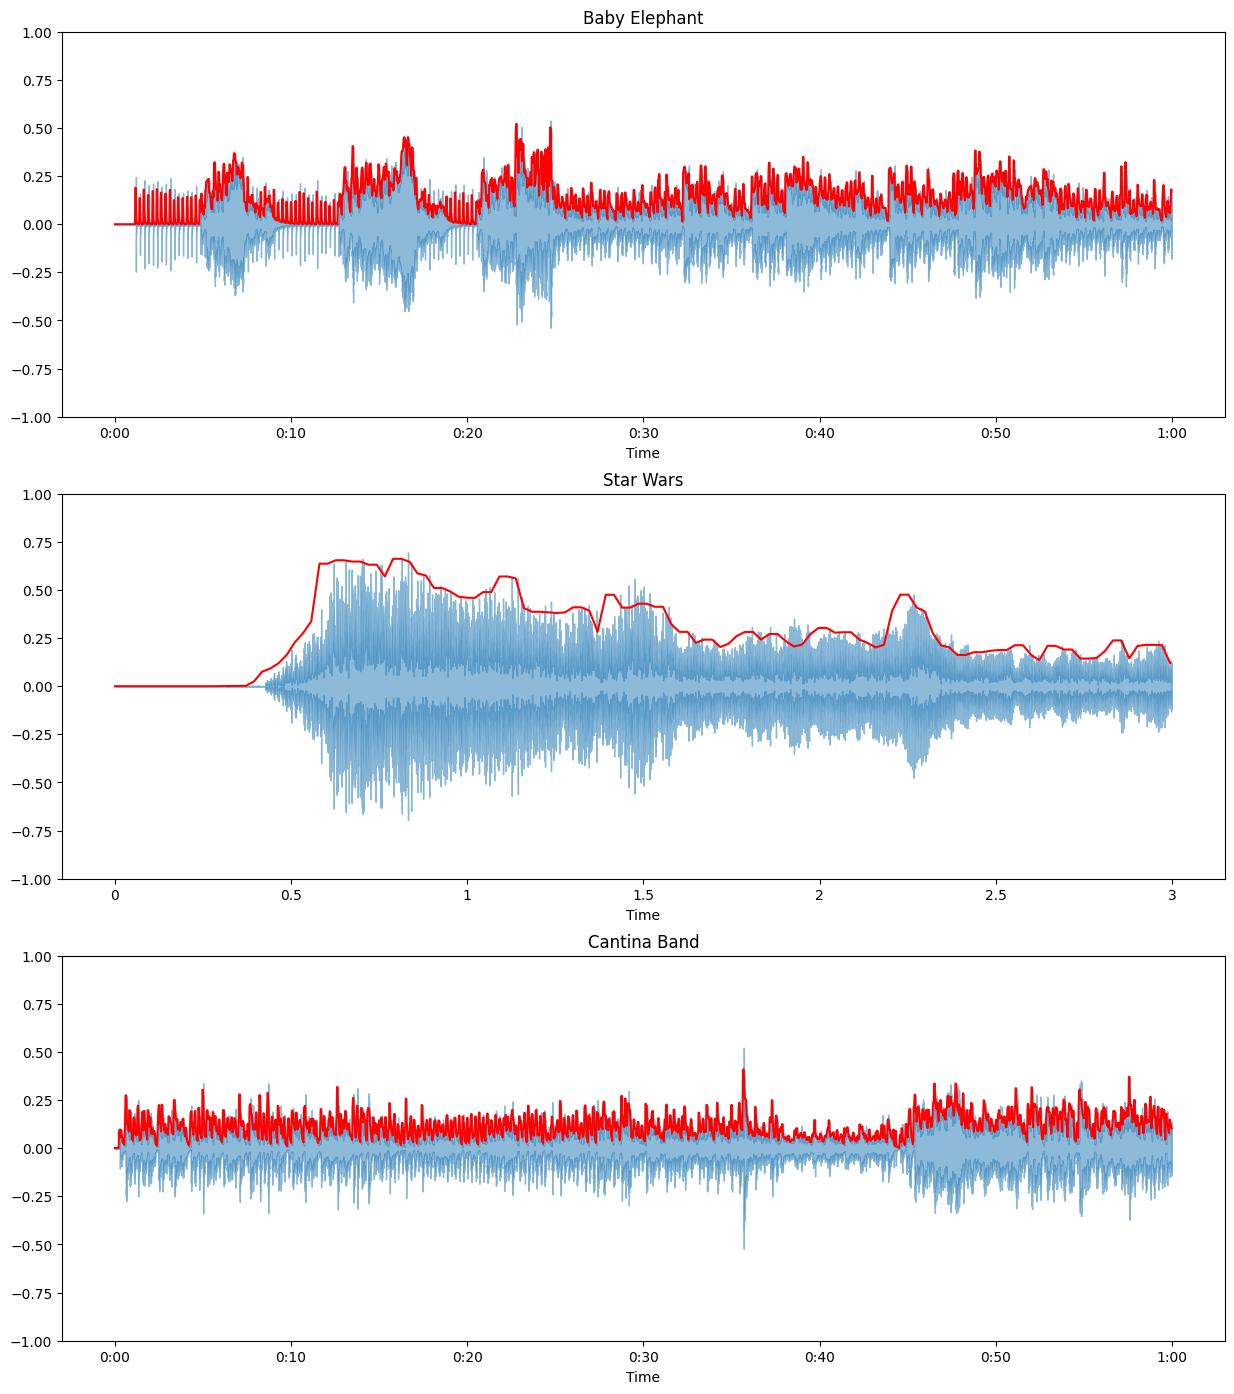

In [43]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(BE, alpha=0.5)
plt.plot(t, ae_baby_elephant, color="r")
plt.ylim((-1, 1))
plt.title("Baby Elephant")

plt.subplot(3, 1, 2)
librosa.display.waveshow(SW, alpha=0.5)
plt.plot(t1, ae_star_wars, color="r")
plt.ylim((-1, 1))
plt.title("Star Wars")

plt.subplot(3, 1, 3)
librosa.display.waveshow(CB, alpha=0.5)
plt.plot(t2, ae_cantina_band, color="r")
plt.ylim((-1, 1))
plt.title("Cantina Band")

plt.show()